In [ ]:
import os
import csv
from utils import *
import numpy as np

model = "deepseek_r1"
prompt = 1
tasks = ["solve", "unsol"]
datasets = ["aime", "amc", "math", "minerva"]

input_dir = "../exp/{}_T0.0_{}/{}"
output_dir = "../figs/{}_T0.0_{}"

def reliability_figure():
    for task in tasks:
        input_path = os.path.join(input_dir.format(model, prompts[prompt], task), "pass.csv")
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        output_dir = os.path.join(output_dir.format(model, prompts[prompt], task))
        fig_path = os.path.join(output_dir, f"{task}.svg")
        real_path = os.path.join(output_dir, f"{task}_real.png")
        save_path = os.path.join(output_dir, f"{task}.txt")

        results = []

        with open(input_path, mode='r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                results.append(row)

        unsolve_dict = {"correct": 0, "incorrect": 0, "unmatched": 0, "unknown": 0, "unsolvable": 0}
        solve_dict = {"correct": 0, "incorrect": 0, "unmatched": 0, "unknown": 0, "unsolvable": 0}

        for res in results:
            if task in res["dataset"]:
                if task == res["dataset"]:
                    for key in solve_dict.keys():
                        solve_dict[key] += int(res[key])
                else:
                    for key in unsolve_dict.keys():
                        unsolve_dict[key] += int(res[key])

        print("solved: ", solve_dict)
        print("unsolved: ", unsolve_dict)
        cor_solve_ratio = solve_dict["correct"] / np.sum(list(solve_dict.values()))
        inc_unsolve_ratio = unsolve_dict["unsolvable"] / np.sum(list(unsolve_dict.values()))

        print("solved ratio: ", cor_solve_ratio)
        print("unsolved ratio: ", inc_unsolve_ratio)

        real_dict = {key: solve_dict.get(key, 0) + unsolve_dict.get(key, 0) for key in solve_dict.keys()}
        print("real_dict: ", real_dict)

        truthful = round((cor_solve_ratio+inc_unsolve_ratio)/2, 4)
        print("truthful: ", truthful)
        with open(save_path, 'w') as f:
            f.write(f"solved: {solve_dict}\n")
            f.write(f"unsolved: {unsolve_dict}\n")
            f.write(f"solved ratio: {cor_solve_ratio}\n")
            f.write(f"unsolved ratio: {inc_unsolve_ratio}\n")
            f.write(f"real_dict: {real_dict}\n")
            f.write(f"truthful: {truthful}\n")

solved:  {'correct': 21, 'incorrect': 9, 'unmatched': 0, 'unknown': 0, 'unsolvable': 0}
unsolved:  {'correct': 5, 'incorrect': 28, 'unmatched': 0, 'unknown': 2, 'unsolvable': 25}
solved ratio:  0.7
unsolved ratio:  0.4166666666666667
real_dict:  {'correct': 26, 'incorrect': 37, 'unmatched': 0, 'unknown': 2, 'unsolvable': 25}
truthful:  0.5583


/var/folders/_z/088jf1x159v9xhz0shjj5t0r0000gn/T/ipykernel_73958/25893681.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # 自动调整布局


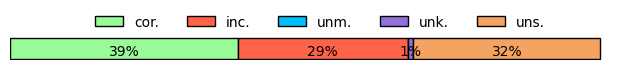

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# print(list(real_dict.values()))
# Color Scheme Website: https://blog.csdn.net/CD_Don/article/details/88070453

ratios = list(real_dict.values()) / np.sum(list(real_dict.values()))
rounded_ratios = [round(ratio, 2) for ratio in ratios]
# print(rounded_ratios)
labels = ["cor.", "inc.", "unm.", "unk.", "uns."]
colors = ['palegreen', 'tomato', 'deepskyblue', 'mediumpurple', 'sandybrown']

fig, ax = plt.subplots(figsize=(8, 0.3))
left = 0

for ratio, label, color in zip(rounded_ratios, labels, colors):
    ax.barh(0, ratio, left=left, color=color, edgecolor='black', label=label)
    if ratio > 0:
        ax.text(left + ratio / 2, -0.1, f'{ratio:.0%}', ha='center', va='center', color='black', fontsize=10)
    else:
        continue
    left += ratio

# for ratio, label, color in zip(ratios, labels, colors):
#     plt.text(left - ratio / 2, 0, label, ha='center', va='center', color='white')

ax.axis('off')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 2.5), ncol=len(labels), frameon=False)

plt.tight_layout()  # 自动调整布局
plt.savefig(fig_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件

plt.show()

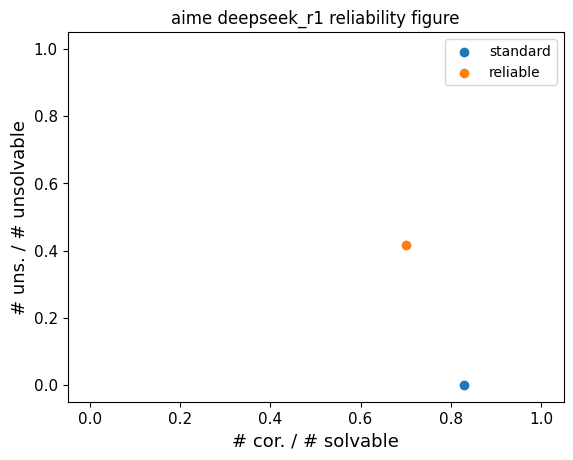

In [155]:
import matplotlib.pyplot as plt

# 示例数据
deepseek_r1 = {
    "aime": {
        "standard": [0.83, 0.0],
        "reliable": [0.7, 0.416]
    },
    "amc":{
        "standard": [0.92, 0.0],
        "reliable": [0.90, 0.47]
    }
}
# 绘制散点图
for key, value in deepseek_r1[task].items():
    x = value[0]
    y = value[1]
    plt.scatter(x, y, label=key)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.title(f'{task} {model} reliability figure')
plt.xlabel('# cor. / # solvable', fontdict={'fontsize': 13})
plt.ylabel('# uns. / # unsolvable', fontdict={'fontsize': 13})

plt.tick_params(axis='both', labelsize=11)

plt.legend()

# plt.grid(True)

# 显示图形
plt.savefig(real_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件
plt.show()


In [64]:
import os
import csv
from utils import *
import numpy as np

models = ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o", "distill-32b", "distill-14b", "distill-7b", "qwen-7b", "distill-1.5b", "qwen-1.5b"]
instructions = [0, 1]
tasks = ["solve", "unsol"]
datasets = ["aime", "amc", "math", "minerva"]

input_dir = "../exp/{}_T0.0_{}/{}"
real_dir = "../figs/prec/{}"
prud_dir = "../figs/prud/{}"
length_dir = "../figs/length/{}"

real_dict = {}

for dataset in datasets:
    real_dict[dataset] = {}
    for model in models:
        real_dict[dataset][model] = {}
        for prompt in instructions:
            real_dict[dataset][model][prompt] = {}
            for task in tasks:
                input_path = os.path.join(input_dir.format(model, prompts[prompt], task), "pass.csv")
                
                results = []

                with open(input_path, mode='r') as file:
                    csv_reader = csv.DictReader(file)
                    for row in csv_reader:
                        if row["dataset"] == dataset:
                            real_dict[dataset][model][prompt][task] = row




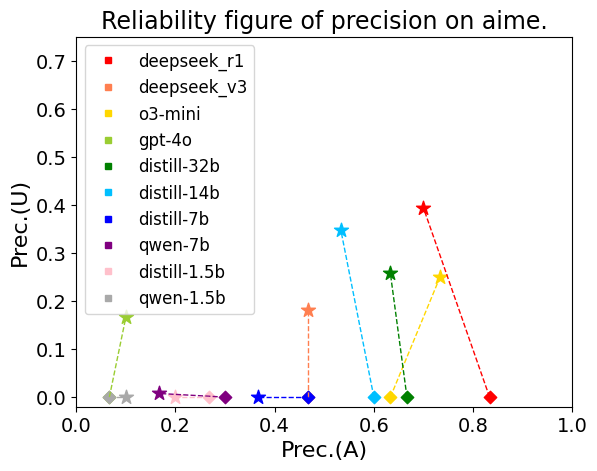

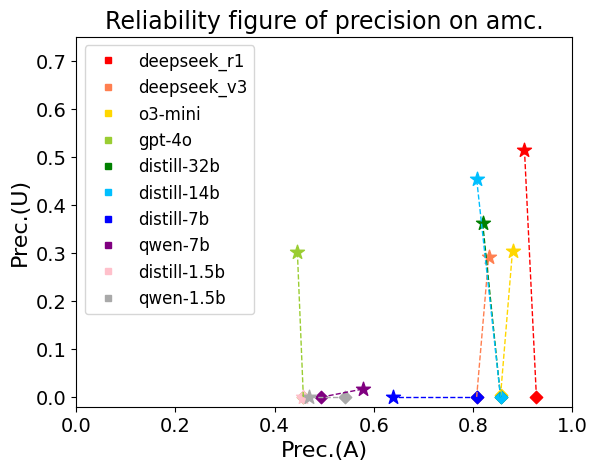

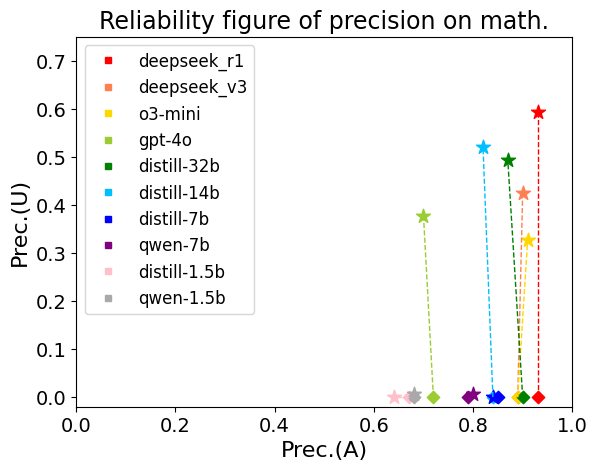

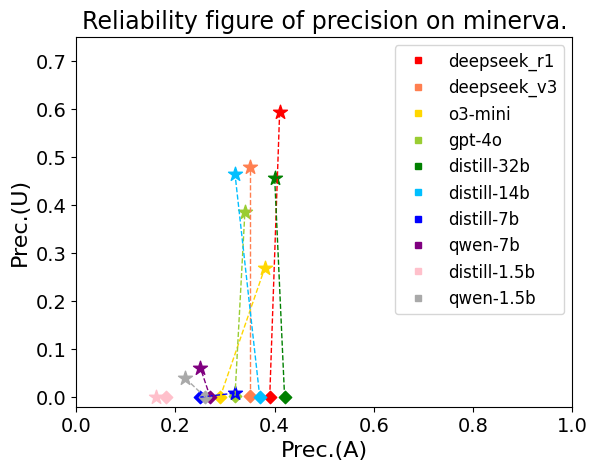

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

metric = "precision"

# colors = {
#     "deepseek_r1": "blue",
#     "deepseek_v3": "deepskyblue",
#     "o3-mini": "red",
#     "gpt-4o": "salmon",
#     "distill-32b": "purple",
#     "distill-14b": "cyan",
#     "distill-7b": "seagreen",
#     "qwen-7b": "yellow",
#     "distill-1.5b": "magenta",
#     "qwen-1.5b": "lightpink",
# }

colors = {
    "deepseek_r1": "red",
    "deepseek_v3": "coral",
    "o3-mini": "gold",
    "gpt-4o": "yellowgreen",
    "distill-32b": "green",
    "distill-14b": "deepskyblue",
    "distill-7b": "blue",
    "qwen-7b": "purple",
    "distill-1.5b": "pink",
    "qwen-1.5b": "darkgray",
}

# dataset = "aime"
for dataset in datasets:
    # plt.figure(figsize=(6, 8))
    plots_x_std, plots_y_std = [], []
    plots_x_rel, plots_y_rel = [], []
    for model in models:
        for prompt in instructions:
            x = real_dict[dataset][model][prompt]["solve"][metric]
            y = real_dict[dataset][model][prompt]["unsol"][metric]
            # print(f"{model} {prompt} {x} {y}")

            if prompt == 0:
                plt.scatter(float(x), float(y), marker='D', s=40, c=colors[model], label=f"{model}")
            else:
                plt.scatter(float(x), float(y), marker='*', s=110, c=colors[model])

        plt.plot([float(real_dict[dataset][model][0]["solve"][metric]), float(real_dict[dataset][model][1]["solve"][metric])], 
                    [float(real_dict[dataset][model][0]["unsol"][metric]), float(real_dict[dataset][model][1]["unsol"][metric])], 
                    color=colors[model], linestyle='--', linewidth=1)


    legend_elements = []
    for model in models:
        legend_elements.append(Line2D([0], [0], color=colors[model], lw=0, marker="s", label=model, markersize=4))

    plt.xlim(0.0, 1.0)
    plt.ylim(-0.02, 0.64)

    plt.title(f'Reliability figure of precision on {dataset}.', fontdict={'fontsize': 17})
    plt.xlabel('Prec.(A)', fontdict={'fontsize': 16})
    plt.ylabel('Prec.(U)', fontdict={'fontsize': 16})

    plt.tick_params(axis='both', labelsize=14)

    plt.legend(handles=legend_elements, fontsize=13)

    real_path = os.path.join(real_dir.format(dataset) + ".svg")
    plt.savefig(real_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件
    plt.show()


In [63]:
metrics = ["precision", "prudence"]

for dataset in datasets:
    for model in ["distill-32b"]:
        for prompt in instructions:
            prec_sol = float(real_dict[dataset][model][prompt]["solve"]["precision"])
            prec_unl = float(real_dict[dataset][model][prompt]["unsol"]["precision"])
            prud_sol = float(real_dict[dataset][model][prompt]["solve"]["prudence"])
            prud_unl = float(real_dict[dataset][model][prompt]["unsol"]["prudence"])
            prec = (prec_sol + prec_unl) / 2
            prud = (prud_sol + prud_unl) / 2
            print(f"{model} {prompt} {dataset}: & {round(prec, 3)} & {round(prud, 3)}")

distill-32b 0 aime: & 0.333 & 0.0
distill-32b 1 aime: & 0.445 & 0.008
distill-32b 0 amc: & 0.428 & 0.0
distill-32b 1 amc: & 0.591 & 0.0
distill-32b 0 math: & 0.45 & 0.0
distill-32b 1 math: & 0.682 & 0.0
distill-32b 0 minerva: & 0.21 & 0.0
distill-32b 1 minerva: & 0.428 & 0.0


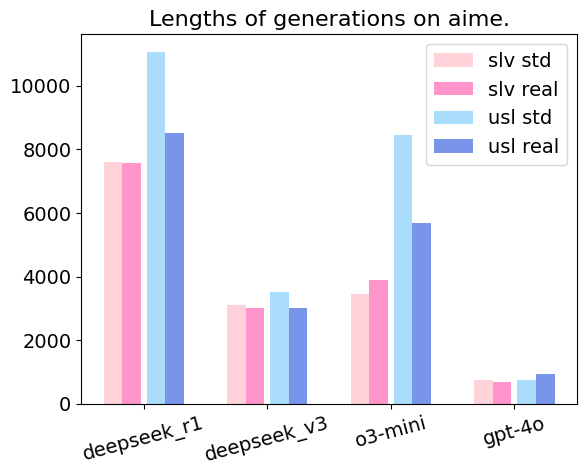

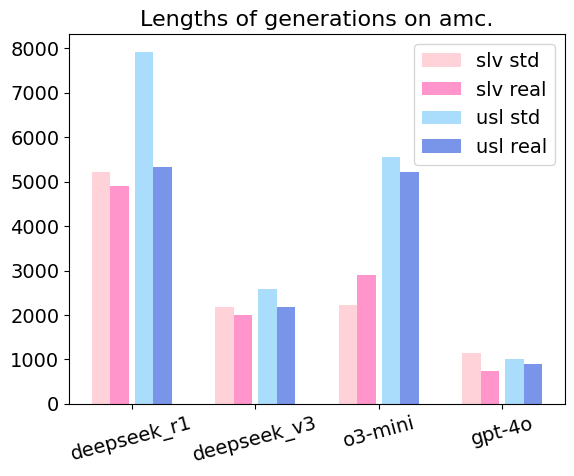

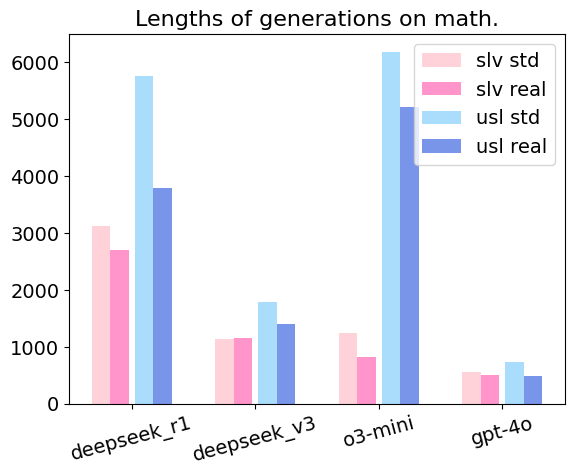

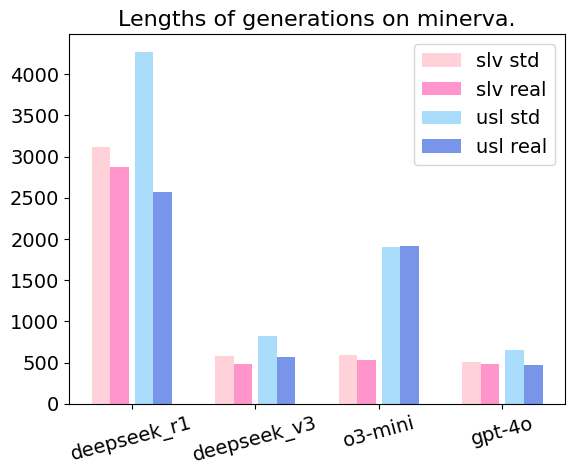

In [53]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.15

# 设置柱子位置
x = np.arange(len(["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"]))
x2 = x + bar_width
x3 = x + bar_width * 2 + 0.05
x4 = x + bar_width * 3 + 0.05

for dataset in datasets:
    # plt.figure(figsize=(8, 4.5))
    sol_len_stds = []
    uns_len_stds = []
    sol_len_rels = []
    uns_len_rels = []
    for model in ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"]:
        sol_len_std = int(real_dict[dataset][model][0]["solve"]["length"])
        uns_len_std = int(real_dict[dataset][model][0]["unsol"]["length"])
        sol_len_rel = int(real_dict[dataset][model][1]["solve"]["length"])
        uns_len_rel = int(real_dict[dataset][model][1]["unsol"]["length"])
        sol_len_stds.append(sol_len_std)
        uns_len_stds.append(uns_len_std)
        sol_len_rels.append(sol_len_rel)
        uns_len_rels.append(uns_len_rel)

    plt.bar(x, sol_len_stds, width=bar_width, color="pink", label='slv std', alpha=0.7)
    plt.bar(x2, sol_len_rels, width=bar_width, color="hotpink", label='slv real', alpha=0.7)
    plt.bar(x3, uns_len_stds, width=bar_width, color="lightskyblue", label='usl std', alpha=0.7)
    plt.bar(x4, uns_len_rels, width=bar_width, color="royalblue", label='usl real', alpha=0.7)
    # plt.bar(x, sol_len_stds, width=bar_width, color=list(colors.values())[:len(models)], label='Group 1', alpha=0.7)
    # plt.bar(x2, uns_len_stds, width=bar_width, color=list(colors.values())[:len(models)], label='Group 2', alpha=0.7)
    # plt.bar(x3, sol_len_rels, width=bar_width, color='blue', label='Group 1', alpha=0.7)
    # plt.bar(x4, uns_len_rels, width=bar_width, color='orange', label='Group 2', alpha=0.7)

    # 设置横坐标标签
    plt.xticks(x + bar_width * 2 - 0.05, ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"], rotation=15, fontsize=14)
    plt.yticks(fontsize=14)

    # 添加标题和图例
    plt.title("Lengths of generations on {}.".format(dataset), fontdict={'fontsize': 16})
    # plt.xlabel("LLMs", fontdict={'fontsize': 13})
    # plt.ylabel("Len.", fontdict={'fontsize': 15})
    plt.legend(fontsize=14)

    len_path = os.path.join(length_dir.format(dataset) + "_len.svg")
    plt.savefig(len_path, dpi=300, bbox_inches='tight')
    plt.show()

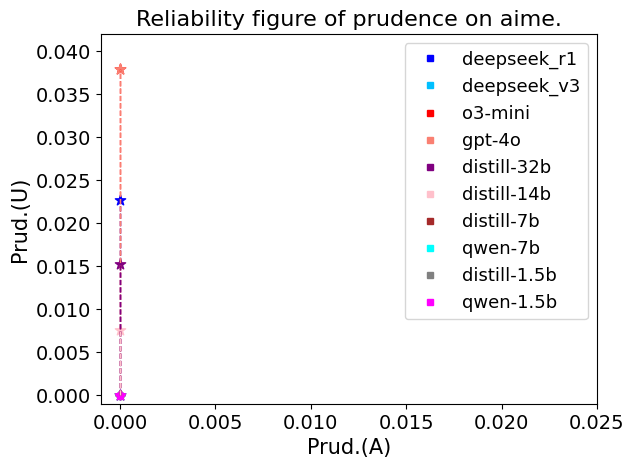

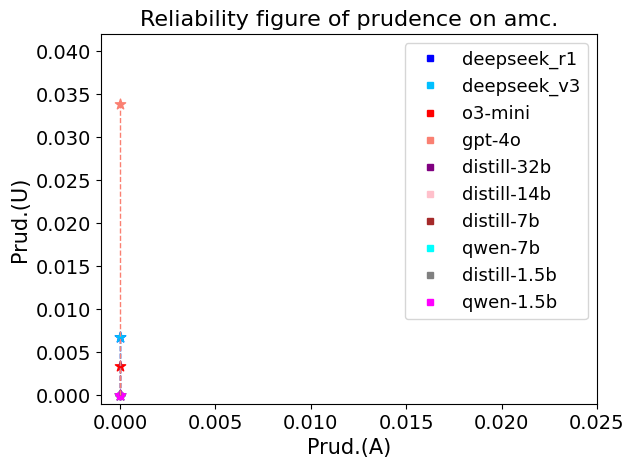

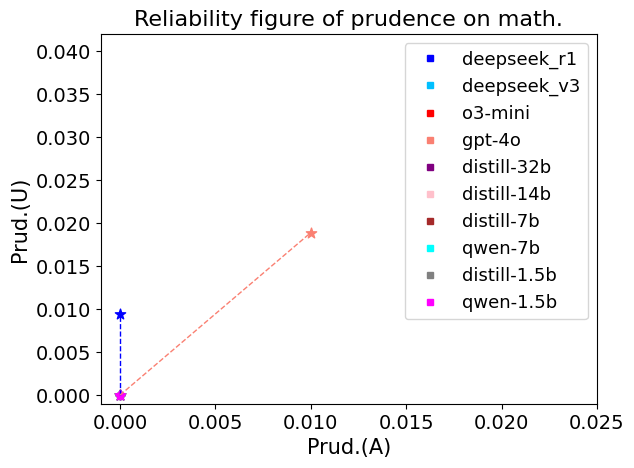

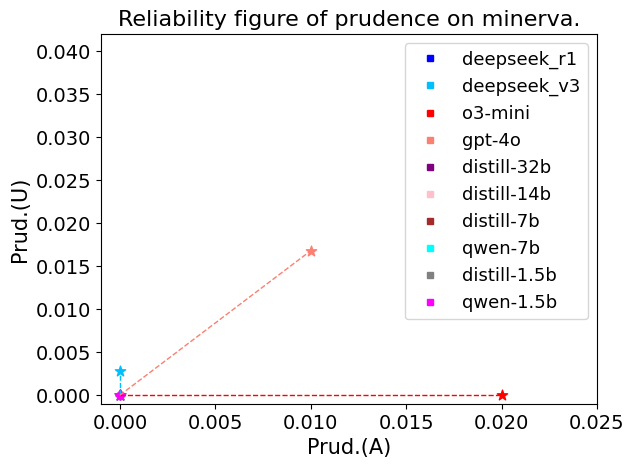

In [66]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

metric = "prudence"

colors = {
    "deepseek_r1": "blue",
    "deepseek_v3": "deepskyblue",
    "o3-mini": "red",
    "gpt-4o": "salmon",
    "distill-32b": "purple",
    "distill-14b": "pink",
    "distill-7b": "brown",
    "distill-1.5b": "gray",
    "qwen-7b": "cyan",
    "qwen-1.5b": "magenta",
}


# dataset = "aime"
for dataset in datasets:
    plots_x_std, plots_y_std = [], []
    plots_x_rel, plots_y_rel = [], []
    for model in models:
        for prompt in instructions:
            x = real_dict[dataset][model][prompt]["solve"][metric]
            y = real_dict[dataset][model][prompt]["unsol"][metric]
            # print(f"{model} {prompt} {x} {y}")

            if prompt == 0:
                plt.scatter(float(x), float(y), marker='D', s=20, c=colors[model], label=f"{model}")
            else:
                plt.scatter(float(x), float(y), marker='*', s=60, c=colors[model])

        plt.plot([float(real_dict[dataset][model][0]["solve"][metric]), float(real_dict[dataset][model][1]["solve"][metric])], 
                    [float(real_dict[dataset][model][0]["unsol"][metric]), float(real_dict[dataset][model][1]["unsol"][metric])], 
                    color=colors[model], linestyle='--', linewidth=1)


    legend_elements = []
    for model in models:
        legend_elements.append(Line2D([0], [0], color=colors[model], lw=0, marker="s", label=model, markersize=4))

    plt.xlim(-0.001, 0.025)
    plt.ylim(-0.001, 0.042)

    plt.title(f'Reliability figure of prudence on {dataset}.', fontdict={'fontsize': 16})
    plt.xlabel('Prud.(A)', fontdict={'fontsize': 15})
    plt.ylabel('Prud.(U)', fontdict={'fontsize': 15})

    plt.tick_params(axis='both', labelsize=14)

    plt.legend(handles=legend_elements, fontsize=13)

    prud_path = os.path.join(prud_dir.format(dataset) + ".svg")
    plt.savefig(prud_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件
    plt.show()


In [2]:
import os
import csv
from utils import *
import numpy as np

models = ["deepseek_r1", "o3-mini", "distill-32b", "distill-14b", "distill-7b", "distill-1.5b", "deepseek_v3", "gpt-4o", "qwen-7b", "qwen-1.5b", "qwen3-32b", "qwen3-14b", "qwen3-235b"]
instructions = [1]
tasks = ["solve", "unsol"]
datasets = ["aime", "amc", "math", "minerva"]

input_dir = "../exp/{}_T0.0_{}/{}"
real_dir = "../figs/real/{}"
prud_dir = "../figs/prud/{}"
length_dir = "../figs/length/{}"

count_task = {
    "solve_all": 313,
    "unsol_all": 1102,
    "solve": {
        "aime": 30,
        "amc": 83,
        "math": 100,
        "minerva": 100
    },
    "unsol": {
        "aime": 132,
        "amc": 295,
        "math": 318,
        "minerva": 357
    }
}

real_dict = {}

for dataset in datasets:
    real_dict[dataset] = {}
    for model in models:
        real_dict[dataset][model] = {}
        for prompt in instructions:
            real_dict[dataset][model][prompt] = {}
            for task in tasks:
                input_path = os.path.join(input_dir.format(model, prompts[prompt], task), "pass.csv")
                
                results = []

                with open(input_path, mode='r') as file:
                    csv_reader = csv.DictReader(file)
                    for row in csv_reader:
                        if row["dataset"] == dataset:
                            assert int(row["success"]) + int(row["failed"]) + int(row["unknown"]) == count_task[task][dataset], f"Error in {dataset} {model} {prompt} {task}: {row['success']} + {row['failed']} + {row['unknown']} != {count_task[task][dataset]}"
                            real_dict[dataset][model][prompt][task] = row


for model in models:
    for prompt in instructions:
        precision, prudence, length = {}, {}, {}
        for task in tasks:
            precision[task], prudence[task], length[task] = 0, 0, 0
            for dataset in datasets:
                precision[task] += float(real_dict[dataset][model][prompt][task]["precision"]) * (count_task[task][dataset] / count_task["{}_all".format(task)])
                prudence[task] += float(real_dict[dataset][model][prompt][task]["prudence"]) * (count_task[task][dataset] / count_task["{}_all".format(task)])
                length[task] += int(real_dict[dataset][model][prompt][task]["length"]) * (count_task[task][dataset] / count_task["{}_all".format(task)])
            # precision[task] /= len(datasets)
            # prudence[task] /= len(datasets)
            # length[task] /= len(datasets)
        print(f"{model} {prompt} avg: & {round(precision['solve'], 3)} & {round(prudence['solve'], 3)} & {round(length['solve']/1000, 2)}k & \
{round(precision['unsol'], 3)} & {round(prudence['unsol'], 3)} & {round(length['unsol']/1000, 1)}k & \
{round((precision['solve'] + precision['unsol']) / 2, 3)} & {round((prudence['solve'] + prudence['unsol']) / 2, 3)}")

deepseek_r1 1 avg: & 0.735 & 0.0 & 3.81k & 0.549 & 0.007 & 4.4k & 0.642 & 0.004
o3-mini 1 avg: & 0.716 & 0.006 & 1.57k & 0.293 & 0.005 & 4.2k & 0.504 & 0.006
distill-32b 1 avg: & 0.684 & 0.0 & 5.05k & 0.418 & 0.002 & 9.4k & 0.551 & 0.001
distill-14b 1 avg: & 0.629 & 0.0 & 6.23k & 0.465 & 0.001 & 11.0k & 0.547 & 0.0
distill-7b 1 avg: & 0.575 & 0.0 & 6.24k & 0.003 & 0.0 & 6.6k & 0.289 & 0.0
distill-1.5b 1 avg: & 0.396 & 0.0 & 9.37k & 0.0 & 0.0 & 9.7k & 0.198 & 0.0
deepseek_v3 1 avg: & 0.665 & 0.0 & 1.34k & 0.377 & 0.003 & 1.5k & 0.521 & 0.001
gpt-4o 1 avg: & 0.46 & 0.006 & 0.58k & 0.335 & 0.025 & 0.6k & 0.397 & 0.015
qwen-7b 1 avg: & 0.505 & 0.0 & 0.82k & 0.027 & 0.0 & 0.9k & 0.266 & 0.0
qwen-1.5b 1 avg: & 0.422 & 0.0 & 0.74k & 0.015 & 0.0 & 0.8k & 0.218 & 0.0
qwen3-32b 1 avg: & 0.764 & 0.0 & 5.88k & 0.326 & 0.0 & 6.0k & 0.545 & 0.0
qwen3-14b 1 avg: & 0.748 & 0.003 & 5.87k & 0.399 & 0.0 & 6.1k & 0.573 & 0.002
qwen3-235b 1 avg: & 0.767 & 0.0 & 5.64k & 0.475 & 0.003 & 5.6k & 0.621 & 0.001


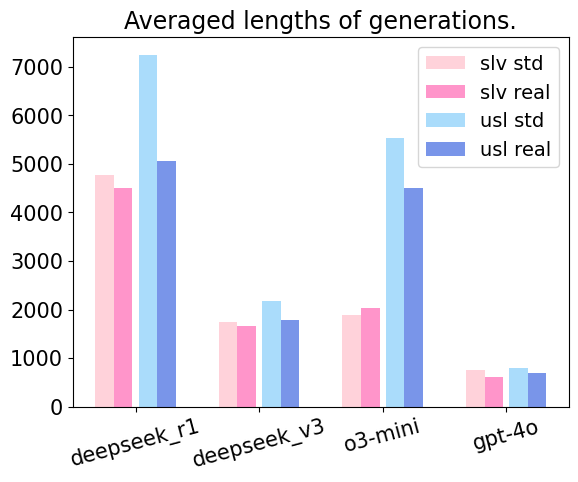

In [51]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.15

x = np.arange(len(["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"]))
x2 = x + bar_width
x3 = x + bar_width * 2 + 0.05
x4 = x + bar_width * 3 + 0.05

sol_len_stds, uns_len_stds = [], []
sol_len_rels, uns_len_rels = [], []

for model in ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"]:
    sol_len_std, uns_len_std, sol_len_rel, uns_len_rel = 0, 0, 0, 0
    for dataset in datasets:
        sol_len_std += int(real_dict[dataset][model][0]["solve"]["length"])
        uns_len_std += int(real_dict[dataset][model][0]["unsol"]["length"])
        sol_len_rel += int(real_dict[dataset][model][1]["solve"]["length"])
        uns_len_rel += int(real_dict[dataset][model][1]["unsol"]["length"])
    sol_len_std /= len(datasets)
    uns_len_std /= len(datasets)
    sol_len_rel /= len(datasets)
    uns_len_rel /= len(datasets)
    sol_len_stds.append(sol_len_std)
    uns_len_stds.append(uns_len_std)
    sol_len_rels.append(sol_len_rel)
    uns_len_rels.append(uns_len_rel)

plt.bar(x, sol_len_stds, width=bar_width, color="pink", label='slv std', alpha=0.7)
plt.bar(x2, sol_len_rels, width=bar_width, color="hotpink", label='slv real', alpha=0.7)
plt.bar(x3, uns_len_stds, width=bar_width, color="lightskyblue", label='usl std', alpha=0.7)
plt.bar(x4, uns_len_rels, width=bar_width, color="royalblue", label='usl real', alpha=0.7)
# plt.bar(x, sol_len_stds, width=bar_width, color=list(colors.values())[:len(models)], label='Group 1', alpha=0.7)
# plt.bar(x2, uns_len_stds, width=bar_width, color=list(colors.values())[:len(models)], label='Group 2', alpha=0.7)
# plt.bar(x3, sol_len_rels, width=bar_width, color='blue', label='Group 1', alpha=0.7)
# plt.bar(x4, uns_len_rels, width=bar_width, color='orange', label='Group 2', alpha=0.7)

# 设置横坐标标签
plt.xticks(x + bar_width * 2 - 0.05, ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o"], rotation=15, fontsize=15)
plt.yticks(fontsize=15)

# 添加标题和图例
plt.title("Averaged lengths of generations.", fontdict={'fontsize': 17})
# plt.xlabel("LLMs", fontdict={'fontsize': 13})
# plt.ylabel("Len.", fontdict={'fontsize': 15})
plt.legend(fontsize=14)

len_path = os.path.join(length_dir.format("avg") + "_len.svg")
plt.savefig(len_path, dpi=300, bbox_inches='tight')
plt.show()